# Movie Genre Trends on IMDB over the years

### Create dataset as per genre ratings and review numbers

The created dataset is called *movie_data_single_genre*, and can be directly downloaded from here https://drive.google.com/file/d/1FeYNXyVxjiIxYYkywCJ_jk6Lt7sefpnX/view?usp=sharing 

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score

In [24]:
movie_general_data = pd.read_table('../data/general_data.tsv', delimiter='\t', usecols=['tconst','titleType', 'primaryTitle','genres', 'startYear'], dtype={'tconst':str,'titleType': str, 'primaryTitle':str, 'genres':object, 'startYear': object})
movie_rating_data = pd.read_table('../data/rating_data.tsv', delimiter='\t', usecols=['tconst','averageRating','numVotes'], dtype={'tconst':str,'averageRating':float, 'numVotes': int})
movie_data = pd.merge(movie_general_data, movie_rating_data, on='tconst', how='inner')

movie_data.query(expr = "titleType == 'movie'", inplace= True)

movie_data.drop(columns = ['tconst', 'titleType'], inplace= True)
movie_data.reset_index(inplace = True, drop = True)

In [48]:
movie_data.dropna(inplace=True, subset=['startYear', 'averageRating','numVotes'])

null_string = '\\' + 'N'
movie_data.query(expr = 'genres != @null_string & startYear != @null_string', inplace= True)

# turning the year column into int
movie_data['startYear'] = movie_data['startYear'].astype(int) 

if isinstance(movie_data['genres'][0], str) :
    movie_data['genres'] = movie_data['genres'].map(lambda genre: genre.split(','))

movie_data_single_genre = movie_data.explode('genres', ignore_index= True)
movie_data_single_genre.index.name = 'id'

movie_data_single_genre.to_csv('../data/movie_data_single_genre.csv') 

display(movie_data_single_genre.head(10))


,primaryTitle,startYear,genres,averageRating,numVotes
id,,,,,
0,Miss Jerry,1894,Romance,5.3,204
1,The Corbett-Fitzsimmons Fight,1897,Documentary,5.3,466
2,The Corbett-Fitzsimmons Fight,1897,News,5.3,466
3,The Corbett-Fitzsimmons Fight,1897,Sport,5.3,466
4,The Story of the Kelly Gang,1906,Action,6.0,820
5,The Story of the Kelly Gang,1906,Adventure,6.0,820
6,The Story of the Kelly Gang,1906,Biography,6.0,820
7,The Prodigal Son,1907,Drama,4.4,20
8,Robbery Under Arms,1907,Drama,4.3,24


### Analysis on a specific genre of movie

For example analysis, we start with only one gere, Romance. To obtain relevant data on an yearly basis, a weighted average will be computed for each year. The *averageRating* will be the variables, and the *numVotes* will serve as the weights. This way, we obtain a more realisting indices on the quality of the movie.

In [2]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    weighted_rating = (val * wt).sum() / wt.sum()

    return weighted_rating

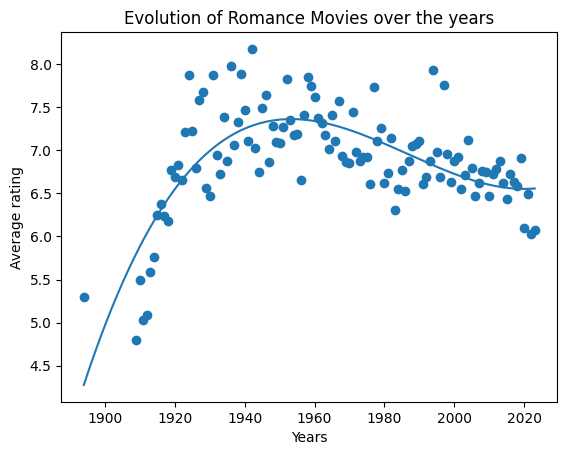

Coef of correlation:0.5340069370481637


In [49]:
romance = movie_data_single_genre.query(expr = "genres == 'Romance'")

rating = romance.groupby('startYear').apply(weighted_average, 'averageRating', 'numVotes')

x = rating.index
y = rating.values

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
myline = numpy.linspace(x[0],x[x.size-1], 1000)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Evolution of Romance Movies over the years')
plt.xlabel('Years')
plt.ylabel('Average rating')
plt.show()

r = r2_score(y, mymodel(x))

print('Coef of correlation:{}'.format(r))

It can be seen that the coeficinet of correlation is close to 0.5, witch means we can make predicitions, but not very accurate ones. However, a conclusion that can be drawn is that the highest rated romance movies were released between 1940 and 1960. Some of which can be seen below.

In [50]:
display(romance.loc[(romance['startYear'] > 1940) & (romance['startYear']<1960)].nlargest(10, 'averageRating'))

,primaryTitle,startYear,genres,averageRating,numVotes
id,,,,,
46352,Meine 99 Bräute,1958,Romance,9.2,20
181206,Humsafar,1953,Romance,9.0,11
40264,Racing Blood,1954,Romance,8.9,17
206279,A Sinful Life,1957,Romance,8.7,9
35064,The Naked and the Wicked,1951,Romance,8.6,33
122924,The Counterfeit Coin,1955,Romance,8.6,2933
155503,Las campanas de Teresa,1957,Romance,8.6,11
165842,Do Sitare,1951,Romance,8.6,11
167368,Anakku Sazali,1956,Romance,8.6,77


### Prediction

Making a prediction for a year that does not have any romantic movies in the dataset. However if the year is already whithin the dataset, its corresponding average rating will be displayed. 

In [300]:
year = 1907

if year in set(romance['startYear']):
    prediction = round(rating[year])
    print('The calculated average rating for a romantic movie from {} is {}.'.format(year, prediction)) 
else:
    prediction = round(mymodel(year), 1)
    print('The predicted average rating for a romantic movie from {} is {}.'.format(year, prediction))

The predicted average rating for a romantic movie from 1907 is 5.6.


### Application

Please choose a number between 1 and 28, each corresponding to a genre as follows: 
1. Adventure
2. Film-Noir
3. War
4. News
5. Action
6. Horror
7. Family
8. Musical
9. Western
10. Animation
11. Music
12. Short
13. Crime
14. Biography
15. Fantasy
16. Mystery
17. Thriller
18. Adult
19. Talk-Show
20. Romance
21. Game-Show
22. Sci-Fi
23. Comedy
24. Documentary
25. History
26. Reality-TV
27. Sport
28. Drama
You chose Adventure


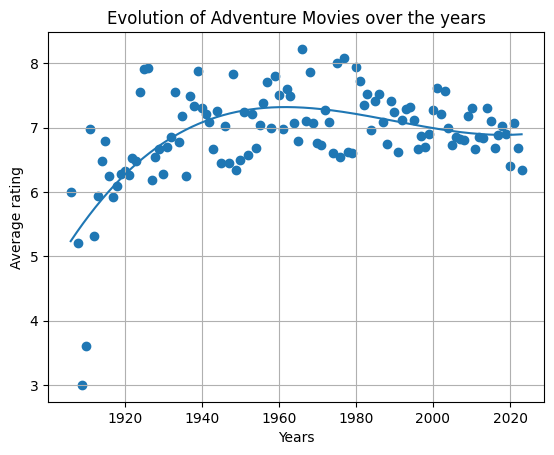

The correlance coefficinet is 0.41751411471491395
There is very low correlation between data, low accuracy predictions can be made.

Some facts resulted from your inquiry:
* The year with the highest average rating(8.2) for Adventure movies is 1966.
* In the year 1966, 215 Adventure movies were released, amongst which, the top 10 rated movies were:


,id,primaryTitle,startYear,genres,averageRating,numVotes
1,57211,"The Good, the Bad and the Ugly",1966,Adventure,8.8,770843
2,258512,Vallavan Oruvan,1966,Adventure,8.3,10
3,144498,Jawan Mard,1966,Adventure,8.0,6
4,220784,The Bandit,1966,Adventure,8.0,206
5,52894,Alazán y enamorado,1966,Adventure,7.9,9
6,57568,La Grande Vadrouille,1966,Adventure,7.9,18808
7,57114,For Love and Gold,1966,Adventure,7.8,5025
8,57995,Orlovi rano lete,1966,Adventure,7.7,905
9,58151,The Sand Pebbles,1966,Adventure,7.6,15539
10,127063,Haiducii,1966,Adventure,7.6,318


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score
from myfunctions import read_from_global_csv

df = pd.read_csv('../data/movie_data_single_genre.csv', index_col='id' )

geners_list = read_from_global_csv('unique_geners_list', list)

print('Please choose a number between 1 and {}, each corresponding to a genre as follows: '.format(len(geners_list)))
for genre in geners_list:
    print('{}. {}'.format(geners_list.index(genre)+1, genre))

choice_id = int(input())

choice = geners_list[choice_id-1]
print('You chose {}'.format(choice))

snap = df.query(expr = "genres == @choice ")
rating = snap.groupby('startYear').apply(weighted_average, 'averageRating', 'numVotes')

x = rating.index
y = rating.values

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
myline = numpy.linspace(x[0],x[x.size-1], 100000)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.title('Evolution of {} Movies over the years'.format(choice))
plt.xlabel('Years')
plt.ylabel('Average rating')
plt.grid()
plt.show()

r = r2_score(y, mymodel(x))

# Providing correlation related data and interpretation
print(f'The correlance coefficinet is {r}')

r = abs(r)

if r < 1:
    if r > 0.9:
        print('There is very high correlation between data, accurate predictions can be made.\n')
    elif r > 0.7:
        print('There is  high correlation between data, somewhat accurate predictions can be made.\n')
    elif r > 0.5:
        print('There is very moderate correlation between data, okay predictions can be made.\n')
    elif r > 0.3:
        print('There is very low correlation between data, low accuracy predictions can be made.\n')
    else:
        print('There is negligible  correlation between data, no predictions can be made.\n')

# Providing movie genre related results
higest_rating_value = rating.max()
higest_rating_year = rating[rating == higest_rating_value].index[0]

higest_rating_movies = snap.query(expr = "startYear == @higest_rating_year ")

higest_rating_movies_counter = higest_rating_movies.count(axis= 'index')[0]

if higest_rating_movies_counter > 10:
    movies_to_display = 10
else:
    movies_to_display = higest_rating_movies_counter

top_movies = higest_rating_movies.nlargest(movies_to_display, 'averageRating')
top_movies.reset_index(inplace = True)
top_movies.index = range(1,len(top_movies)+1)

print('Some facts resulted from your inquiry:')
print(f'* The year with the highest average rating({round(higest_rating_value,1)}) for {choice} movies is {higest_rating_year}.')
print(f'* In the year {higest_rating_year}, {higest_rating_movies_counter} {choice} movies were released, amongst which, the top {movies_to_display} rated movies were:')
display(top_movies)